<a href="https://colab.research.google.com/github/sfe2/STA393/blob/master/MNIST_Dataset_Analysis_with_TF_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [0]:
mnist = tf.keras.datasets.mnist #28x28 sized images of digits
(x_train, y_train),(x_test, y_test) = mnist.load_data()

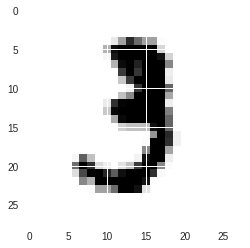

In [0]:
plt.imshow(x_train[10])

**Normalize the x_train data**

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

Build the model

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #turns the image matricies (which are 8x8) into a single vector
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # short for tensorflow.neuralnetwork.rectivifed_linear_unit
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.sigmoid)) 
model.add(tf.keras.layers.Dense(10,  activation=tf.nn.softmax))

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)




Epoch 1/3
60000/60000 [==============================] - 9s 144us/step - loss: 0.2991 - acc: 0.9126
Epoch 2/3
60000/60000 [==============================] - 8s 128us/step - loss: 0.1183 - acc: 0.9642
Epoch 3/3
60000/60000 [==============================] - 8s 130us/step - loss: 0.0816 - acc: 0.9752


In [0]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 68us/step
0.08733351396359504 0.9728


In [0]:
predictions = model.predict([x_test])

1


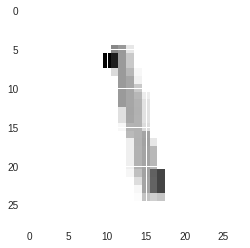

In [0]:
index = 1004
print(np.argmax(predictions[index]))
plt.imshow(x_test[index])